<a href="https://colab.research.google.com/github/seungyeons2/LA2/blob/main/ex02_transform_tiefighter_%EC%8B%9C%EC%8A%B9%EC%97%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 라이브러리 선언

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

INF = 1100
LEN = 100

### 축 그리기 및 사각형 그리기

In [2]:
def draw_axis(ax):
  ax.axhline(0, color='black', alpha=0.3)  # x-axis line
  ax.axvline(0, color='black', alpha=0.3)  # y-axis line
  ax.set_xlim(-INF, INF)
  ax.set_ylim(-INF, INF)
  ax.set_aspect('equal')  # 정사각형 모양으로 backboard 그리기

In [3]:
def draw_rectangle(ax, p1, p2, p3, p4):
  my_polygon = Polygon([p1, p2, p3, p4])
  ax.add_patch(my_polygon)

In [4]:
def draw_object(ax):
  p1 = np.array([0, 0])
  p2 = np.array([LEN, 0])
  p3 = np.array([LEN, LEN])
  p4 = np.array([0, LEN])

  draw_rectangle(ax, p1, p2, p3, p4)

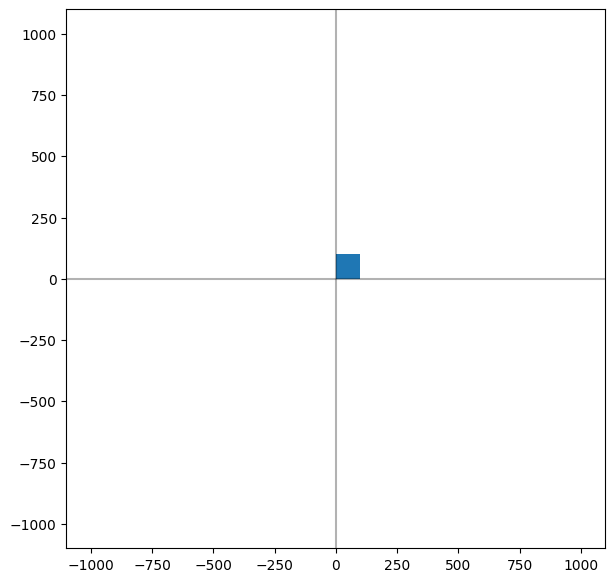

In [5]:
# 그림판 선언 및 크기 설정
fig, ax = plt.subplots(figsize=(7,7))

# 축 그리기
draw_axis(ax)

# 물체 그리기
draw_object(ax)

plt.show()

### 본론
#### 1. 변환 구현
* translate(p, dx, dy)
* rotate(p, theta)  
* scale(p, sx, sy)  
* shear_x(p, sx)  
* shear_y(p, sy)  
* reflect_x(p)  
* reflect_y(p)   
* ...

In [6]:
#======변환 함수======

def translate(p, dx, dy):
  # 동차좌표계로 변환
  hp = np.array([p[0], p[1], 1.0])

  # 이동 변환 행렬 생성
  m = np.array([[1.0, 0.0, dx], [0.0, 1.0, dy], [0.0, 0.0, 1.0]])

  # 행렬과 벡터의 곱
  q = np.dot(m, hp) # (3, 3) * (3, 1) -> (3, 1)

  # 2차원 좌표계로 변환
  q = np.array([q[0], q[1]])
  return q
  
def rotate(p, theta):
  # 동차좌표계로 변환
  hp = np.array([p[0], p[1], 1.0])

  # 회전 변환 행렬 생성
  c = np.cos(theta)
  s = np.sin(theta)
  m = np.array([[c, -s, 0.0], [s, c, 0.0], [0.0, 0.0, 1.0]])

  # 행렬과 벡터의 곱
  q = np.dot(m, hp) 

  # 2차원 좌표계로 변환
  q = np.array([q[0], q[1]])
  return q
  

def scale(p, sx, sy):
  # 동차좌표계로 변환
  hp = np.array([p[0], p[1], 1.0])

  # 크기 변환 행렬 생성
  m = np.array([[sx, 0.0, 0.0], [0.0, sy, 0.0], [0.0, 0.0, 1.0]])

  # 행렬과 벡터의 곱
  q = np.dot(m, hp) 

  # 2차원 좌표계로 변환
  q = np.array([q[0], q[1]])
  return q

def shear_x(p, scale):
 # 동차좌표계로 변환
  hp = np.array([p[0], p[1], 1.0])

  # x축 방향 기울기 변환 행렬 생성
  m = np.array([[1.0, scale, 0.0], [0.0, 1.0, 0.0], [0.0, 0.0, 1.0]])

  # 행렬과 벡터의 곱
  q = np.dot(m, hp) 

  # 2차원 좌표계로 변환
  q = np.array([q[0], q[1]])
  return q

def shear_y(p, sy):
 # 동차좌표계로 변환
  hp = np.array([p[0], p[1], 1.0])

  # y축 방향 기울기 변환 행렬 생성
  m = np.array([[1.0, 0.0, 0.0], [sy, 1.0, 0.0], [0.0, 0.0, 1.0]])

  # 행렬과 벡터의 곱
  q = np.dot(m, hp) 

  # 2차원 좌표계로 변환
  q = np.array([q[0], q[1]])
  return q

def reflect_x(p):
 # 동차좌표계로 변환
  hp = np.array([p[0], p[1], 1.0])

  # y축 방향 기울기 변환 행렬 생성
  m = np.array([[1.0, 0.0, 0.0], [0.0, -1.0, 0.0], [0.0, 0.0, 1.0]])

  # 행렬과 벡터의 곱
  q = np.dot(m, hp) 

  # 2차원 좌표계로 변환
  q = np.array([q[0], q[1]])
  return q

def reflect_y(p):
  # 동차좌표계로 변환
  hp = np.array([p[0], p[1], 1.0])

  # y축 방향 기울기 변환 행렬 생성
  m = np.array([[-1.0, 0.0, 0.0], [0.0, 1.0, 0.0], [0.0, 0.0, 1.0]])

  # 행렬과 벡터의 곱
  q = np.dot(m, hp) 

  # 2차원 좌표계로 변환
  q = np.array([q[0], q[1]])
  return q

#==============

#### 2. 파트 그리기
* draw_cockpit(p1, p2, p3, p4)    # 중앙 조종석
* draw_left_arm(p1, p2, p3, p4)   # 왼쪽 날개축
* draw_left_wing(p1, p2, p3, p4)  # 왼쪽 날개
* draw_right_arm(p1, p2, p3, p4)  # 오른쪽 날개축
* draw_right_wing(p1, p2, p3, p4) # 오른쪽 날개

In [7]:
#그리기 함수 01: 중앙 조종석 그리기

def draw_cockpit(ax, p1, p2, p3, p4):

  # 1. 사각형을 원점으로 이동 변환: q = T(-LEN/2, -LEN/2)p
  q1 = translate(p1, -LEN/2, -LEN/2)
  q2 = translate(p2, -LEN/2, -LEN/2)
  q3 = translate(p3, -LEN/2, -LEN/2)
  q4 = translate(p4, -LEN/2, -LEN/2)

  # 2. 크기 변환:
  s = 5
  q1 = scale(q1, s, s)
  q2 = scale(q2, s, s)
  q3 = scale(q3, s, s)
  q4 = scale(q4, s, s)

  # 3. 회전 변환: R(pi/4)
  q1 = rotate(q1, 3.14/4.0)
  q2 = rotate(q2, 3.14/4.0)
  q3 = rotate(q3, 3.14/4.0)
  q4 = rotate(q4, 3.14/4.0)

  draw_rectangle(ax, q1, q2, q3, q4)

#그리기 함수 02: 왼쪽, 오른쪽 날개축 그리기

def draw_arm(ax, p1, p2, p3, p4):

  # 1. 이동 변환:
  tr = 200 #일단 위아래
  tc = -95 #일단 왼오른
  q1 = translate(p1, tr, tc)
  q2 = translate(p2, tr, tc)
  q3 = translate(p3, tr, tc)
  q4 = translate(p4, tr, tc)

  # 2. 크기 변환:
  q1 = scale(q1, 0.8, 8)
  q2 = scale(q2, 0.8, 8)
  q3 = scale(q3, 0.8, 8)
  q4 = scale(q4, 0.8, 8)

  # 3. 회전 변환: R(pi/n)
  q1 = rotate(q1, 3.14/2.45)
  q2 = rotate(q2, 3.14/2.45)
  q3 = rotate(q3, 3.14/2.45)
  q4 = rotate(q4, 3.14/2.45)

  draw_rectangle(ax, q1, q2, q3, q4) #왼쪽 위
  q1 = reflect_x(q1)
  q2 = reflect_x(q2)
  q3 = reflect_x(q3)
  q4 = reflect_x(q4)
  draw_rectangle(ax, q1, q2, q3, q4) #왼쪽 아래
  q1 = reflect_y(q1)
  q2 = reflect_y(q2)
  q3 = reflect_y(q3)
  q4 = reflect_y(q4)
  draw_rectangle(ax, q1, q2, q3, q4) #오른쪽 아래
  q1 = reflect_x(q1)
  q2 = reflect_x(q2)
  q3 = reflect_x(q3)
  q4 = reflect_x(q4)
  draw_rectangle(ax, q1, q2, q3, q4) #오른쪽 위

#그리기 함수 03: 왼쪽, 오른쪽 날개 그리기

def draw_wing(ax, p1, p2, p3, p4):

  # 1. 이동 변환:
  tr = 570
  tc = -50
  q1 = translate(p1, tr, tc + 20)
  q2 = translate(p2, tr, tc)
  q3 = translate(p3, tr, tc)
  q4 = translate(p4, tr, tc - 20)

  # 2. 크기 변환:
  q1 = scale(q1, 1.2, 9)
  q2 = scale(q2, 1.2, 9)
  q3 = scale(q3, 1.2, 9)
  q4 = scale(q4, 1.2, 9)


  draw_rectangle(ax, q1, q2, q3, q4) #왼쪽

  q1 = reflect_y(q1)
  q2 = reflect_y(q2)
  q3 = reflect_y(q3)
  q4 = reflect_y(q4)
  draw_rectangle(ax, q1, q2, q3, q4) #오른쪽

#그리기 함수 04: 조종석 디테일

def draw_cockpit_detail(ax, p1, p2, p3, p4):

  # 1. 사각형 이동 변환: q = T(-LEN/2, -LEN/2)p
  q1 = translate(p1, -LEN/2 + 30, -LEN/2)
  q2 = translate(p2, -LEN/2 - 30, -LEN/2)
  q3 = translate(p3, -LEN/2, -LEN/2)
  q4 = translate(p4, -LEN/2, -LEN/2)

  # 2. 크기 변환:
  s = 5
  q1 = scale(q1, s, s)
  q2 = scale(q2, s, s)
  q3 = scale(q3, s, s)
  q4 = scale(q4, s, s)


  draw_rectangle(ax, q1, q2, q3, q4)

  # 윗부분
  # 1. 이동변환
  tr = -50
  tc = 100
  q1 = translate(p1, tr, tc)
  q2 = translate(p2, tr, tc)
  q3 = translate(p3, tr - 20, tc - 10)
  q4 = translate(p4, tr + 20, tc - 10)


  # 3. 크기 변환:
  q1 = scale(q1, 4.2, 2)
  q2 = scale(q2, 4.2, 2)
  q3 = scale(q3, 4.2, 2)
  q4 = scale(q4, 4.2, 2)

  draw_rectangle(ax, q1, q2, q3, q4)

  # 4. x축 대칭:
  q1 = reflect_x(q1)
  q2 = reflect_x(q2)
  q3 = reflect_x(q3)
  q4 = reflect_x(q4)

  # 5. 이동 변환:

  tr = -50
  tc = -340
  q1 = translate(p1, tr - 20, tc - 10)
  q2 = translate(p2, tr + 20, tc - 10)
  q3 = translate(p3, tr + 150 , tc + 50)
  q4 = translate(p4, tr - 150, tc + 50)

  draw_rectangle(ax, q1, q2, q3, q4)

In [8]:
#=====오브젝트 그리기=====

def draw_object(ax):
    p1 = np.array([0, 0])
    p2 = np.array([LEN, 0])
    p3 = np.array([LEN, LEN])
    p4 = np.array([0, LEN])
    

    # 중앙 조종석 그리기
    draw_cockpit(ax, p1, p2, p3, p4)

    # 왼쪽, 오른쪽 날개축 그리기
    draw_arm(ax, p1, p2, p3, p4)

    # 왼쪽, 오른쪽 날개 그리기
    draw_wing(ax, p1, p2, p3, p4)

    # [추가 오브젝트] 조종석 그리기
    draw_cockpit_detail(ax, p1, p2, p3, p4)

#==========

### 3. main

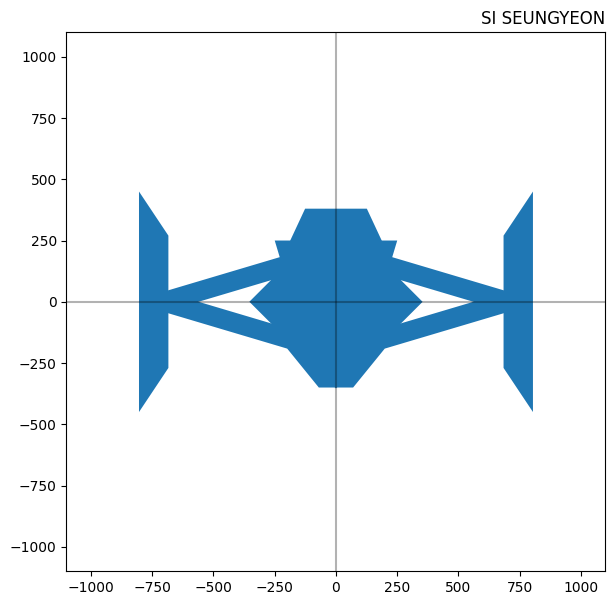

In [9]:
# 그림판 선언 및 크기 설정
fig, ax = plt.subplots(figsize=(7,7))

# 축 그리기
draw_axis(ax)

# 물체 그리기
draw_object(ax)
plt.title("SI SEUNGYEON", loc="right")
plt.show()